In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn.linear_model import LassoCV, Lasso

In [2]:
dataset = pd.read_csv("gender-classifier-DFE-791531.csv", encoding='latin-1')

In [3]:
dataset.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [4]:
del dataset['_golden']
del dataset['_unit_state']
del dataset['_trusted_judgments']
del dataset['_last_judgment_at']
# del dataset['_unit_id']
# del dataset['created']
# del dataset['link_color']
# del dataset['profile_yn_gold']
# del dataset['profileimage']
# del dataset['retweet_count']
# del dataset['text']
# del dataset['tweet_id']
# del dataset['user_timezone'] 
# del dataset['tweet_coord'] 
# del dataset['tweet_count']
#  del dataset['tweet_created']
# del dataset['tweet_location']
# del dataset['gender_gold']





In [5]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# dataset = pd.DataFrame(imp.fit_transform(dataset),
#                    columns=dataset.columns,
#                    index=dataset.index)
dataset = dataset.fillna("-1")

In [6]:
dataset

,_unit_id,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,male,1,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,-1,08C2C2,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,-1,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,male,1,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,-1,0084B4,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,-1,7471,10/26/15 12:40,6.587300e+17,-1,Eastern Time (US & Canada)
2,815719228,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,-1,ABB8C2,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,-1,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,male,1,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,-1,0084B4,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,-1,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,female,1,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,-1,3B94D9,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,-1,31462,10/26/15 12:40,6.587300e+17,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,female,1,yes,1.0,8/5/15 21:16,(rp),302,female,0084B4,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",-1,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,-1
20046,815757681,male,1,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,male,CFB929,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,-1,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",-1
20047,815757830,male,1,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,male,0084B4,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,-1,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,-1
20048,815757921,female,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,70804,female,9266CC,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,-1,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,-1


In [7]:
dataset.dtypes

_unit_id                   int64
gender                    object
gender:confidence         object
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

In [8]:
dataset.columns

Index(['_unit_id', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [9]:
updated_dataset = pd.DataFrame()
for item in dataset.columns:
    updated_dataset[item+ "_Cat"] = labelencoder.fit_transform(dataset[item].astype(str))

In [10]:
#dataset.interpolate(method ='linear', limit_direction ='forward')
# dataset = dataset.dropna()
updated_dataset

,_unit_id_Cat,gender_Cat,gender:confidence_Cat,profile_yn_Cat,profile_yn:confidence_Cat,created_Cat,description_Cat,fav_number_Cat,gender_gold_Cat,link_color_Cat,...,profileimage_Cat,retweet_count_Cat,sidebar_color_Cat,text_Cat,tweet_coord_Cat,tweet_count_Cat,tweet_created_Cat,tweet_id_Cat,tweet_location_Cat,user_timezone_Cat
0,0,3,923,1,266,4986,13023,0,0,248,...,2179,0,560,13473,0,614,1,0,7046,49
1,1,3,923,1,266,1347,6068,5626,0,77,...,4099,0,366,18365,0,12426,1,0,165,56
2,2,3,562,1,266,3705,13439,6014,0,2013,...,14587,1,366,17413,0,10405,1,0,6614,29
3,3,3,923,1,266,11907,7647,2073,0,77,...,913,0,366,9181,0,3008,1,0,4427,119
4,4,2,923,1,266,8932,9201,3846,0,1019,...,4705,0,0,16006,0,6497,1,0,165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,20045,2,923,1,266,16810,481,3218,2,77,...,14037,0,366,5170,0,12798,4,1,5975,0
20046,20046,3,923,1,266,15602,11519,2691,4,2331,...,8702,0,0,8844,0,1790,1,0,3012,0
20047,20047,3,923,1,266,18292,284,4726,4,77,...,13032,0,366,16797,0,5455,4,1,3157,0
20048,20048,2,915,1,266,3920,1765,5743,2,1804,...,14983,0,0,4295,0,10396,1,0,5540,0


In [11]:
def knnModel(X, y):
    print('Features : ')
    print(X)
    print('Label : ')
    print(y)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix
    print('Confusion Matrix : ')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report : ')
    print(classification_report(y_test, y_pred))
    
    
    error = []

    # Calculating the error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))
        
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    
    
    #checking the accuracy of our model on the test data
    print('KNN Score : ')
    print(knn.score(X_test, y_test))
    
    from sklearn.model_selection import cross_val_score
    #training the model with cv of 5 
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    cv_scores = cross_val_score(knn_classifier, X, y, cv=5)
    #printing each cv score (accuracy) and averaging them
    print('Cross Validation Scores : ')
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    
#     #performing leaveOneOut cross validation
#     from sklearn.model_selection import LeaveOneOut
#     loo = LeaveOneOut()
#     cv_scores = cross_val_score(knn_classifier, X, y, cv=loo)
#     #print each cv score (accuracy) and average them
#     print('Cross Validation Leave One Out Scores : ')
#     print(cv_scores)
#     print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    
    #searching for the best k value using GridSearchCV
    from sklearn.model_selection import GridSearchCV
    knn_classifier2 = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'n_neighbors': np.arange(1, 40)}
    #use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(knn_classifier2, param_grid, cv=5)
    #fit model to data
    knn_gscv.fit(X, y)
    
    
    #checking top performing n_neighbors value
    print('Best K Value : ')
    print(knn_gscv.best_params_)
    
    
    #checking mean score for the top performing value of n_neighbors
    print('Best KNN Score : ')
    print(knn_gscv.best_score_)

Features : 
[[    0   923     1 ...     0  7046    49]
 [    1   923     1 ...     0   165    56]
 [    2   562     1 ...     0  6614    29]
 ...
 [20047   923     1 ...     1  3157     0]
 [20048   915     1 ...     0  5540     0]
 [20049   923     1 ...     1   165     0]]
Label : 
[3 3 3 ... 3 2 2]
Confusion Matrix : 
[[ 25   0   0   0   0]
 [  0 666 254 246  31]
 [  0 313 692 324   9]
 [  0 324 498 409  13]
 [  0  84  65  34  23]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.48      0.56      0.52      1197
           2       0.46      0.52      0.49      1338
           3       0.40      0.33      0.36      1244
           4       0.30      0.11      0.16       206

    accuracy                           0.45      4010
   macro avg       0.53      0.50      0.51      4010
weighted avg       0.44      0.45      0.44      4010

KNN Score : 
0.4800498753117207
Cross Validatio

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  F

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\a

['gender:confidence_Cat', 'tweet_created_Cat']


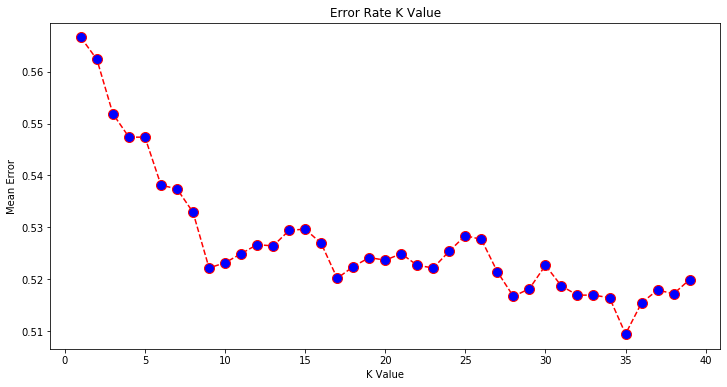

In [12]:
features = ['_unit_id', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone']

# features = [ 'gender:confidence', 'profile_yn',
#        'profile_yn:confidence', 'created', 'description', 'fav_number',
#         'name', 'profile_yn_gold', 
#        'retweet_count', 'sidebar_color', 'text', 
#        'tweet_created', 'tweet_id']

# features = [ 'gender:confidence', 'profile_yn',
#        'profile_yn:confidence', 'description', 'fav_number',
#        'gender_gold',  'name',  'sidebar_color', 'tweet_coord', 'tweet_count',
#        'tweet_created',  'tweet_location']

# features_list = [ 'gender:confidence_Cat', 'profile_yn_Cat',
#        'profile_yn:confidence_Cat', 'created_Cat', 'description_Cat', 'fav_number_Cat',
#         'name_Cat', 'profile_yn_gold_Cat', 
#        'retweet_count_Cat', 'sidebar_color_Cat', 'text_Cat',
#        'tweet_created_Cat', 'tweet_id_Cat']

features_list = ['_unit_id_Cat', 'gender:confidence_Cat', 'profile_yn_Cat',
       'profile_yn:confidence_Cat', 'created_Cat', 'description_Cat', 'fav_number_Cat',
       'gender_gold_Cat', 'link_color_Cat', 'name_Cat', 'profile_yn_gold_Cat', 'profileimage_Cat',
       'retweet_count_Cat', 'sidebar_color_Cat', 'text_Cat', 'tweet_coord_Cat', 'tweet_count_Cat',
       'tweet_created_Cat', 'tweet_id_Cat', 'tweet_location_Cat', 'user_timezone_Cat']

# features_list = [ 'gender:confidence_Cat', 'profile_yn_Cat',
#        'profile_yn:confidence_Cat',  'description_Cat', 'fav_number_Cat',
#        'gender_gold_Cat',  'name_Cat',  'sidebar_color_Cat',  'tweet_coord_Cat', 'tweet_count_Cat',
#        'tweet_created_Cat',  'tweet_location_Cat']

X = updated_dataset.loc[:, features_list].values

weights = {'_unit_id_Cat':5,  'gender:confidence_Cat':3, 'profile_yn_Cat':1,
       'profile_yn:confidence_Cat':1, 'created_Cat':3, 'description_Cat':2, 'fav_number_Cat':3,
       'gender_gold_Cat':4, 'link_color_Cat':4, 'name_Cat':2, 'profile_yn_gold_Cat':3, 'profileimage_Cat':5,
       'retweet_count_Cat':1, 'sidebar_color_Cat':2, 'text_Cat':3, 'tweet_coord_Cat':5, 'tweet_count_Cat':5,
       'tweet_created_Cat':1, 'tweet_id_Cat':2, 'tweet_location_Cat':5, 'user_timezone_Cat':5}



# weights = { 'gender:confidence_Cat':3, 'profile_yn_Cat':1,
#        'profile_yn:confidence_Cat':1, 'created_Cat':3, 'description_Cat':2, 'fav_number_Cat':3,
#         'name_Cat':2, 'profile_yn_gold_Cat':3, 
#        'retweet_count_Cat':1, 'sidebar_color_Cat':2, 'text_Cat':3, 
#        'tweet_created_Cat':1, 'tweet_id_Cat':2}

# weights = { 'gender:confidence_Cat':3, 'profile_yn_Cat':1,
#        'profile_yn:confidence_Cat':1, 'description_Cat':2, 'fav_number_Cat':3,
#        'gender_gold_Cat':4,  'name_Cat':2, 'sidebar_color_Cat':2, 'tweet_coord_Cat':5, 'tweet_count_Cat':5,
#        'tweet_created_Cat':1, 'tweet_location_Cat':5}

orignal_weights = {'_unit_id':5 , 'gender:confidence':3, 'profile_yn':1,
       'profile_yn:confidence':1, 'created':3, 'description':2, 'fav_number':3,
       'gender_gold':4,  'name':2, 'sidebar_color':2,  'tweet_coord':5, 'tweet_count':5,
       'tweet_created':1, 'tweet_location':5}

# orignal_weights = {  'gender:confidence':3, 'profile_yn':1,
#        'profile_yn:confidence':1, 'created':3, 'description':2, 'fav_number':3,
#         'name':2, 'profile_yn_gold':3,
#        'retweet_count':1, 'sidebar_color':2, 'text':3,'tweet_created':1, 'tweet_id':2}

# orignal_weights = {'_unit_id':5  'gender:confidence':3, 'profile_yn':1,
#        'profile_yn:confidence':1, 'created':3, 'description':2, 'fav_number':3,
#        'gender_gold':4, 'link_color':4, 'name':2, 'profile_yn_gold':3, 'profileimage':5,
#        'retweet_count':1, 'sidebar_color':2, 'text':3, 'tweet_coord':5, 'tweet_count':5,
#        'tweet_created':1, 'tweet_id':2, 'tweet_location':5, 'user_timezone':5}


y = updated_dataset.loc[:, ['gender_Cat']].values

knnModel(X,y.ravel()) 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe_model = RFE(model, 2)
rfe_fit = rfe_model.fit(X, y)
colsNotToDrop = []
for feature_list_index in rfe_fit.get_support(indices=True):
    colsNotToDrop.append(updated_dataset.columns[feature_list_index])
print(colsNotToDrop)

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X)
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

In [14]:
pfa = PFA(n_features=10)
pfa.fit(X)

# To get the transformed matrix
matrix = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_

In [15]:
column_indices

[0, 1, 10, 3, 5, 7, 8, 9, 13, 20]

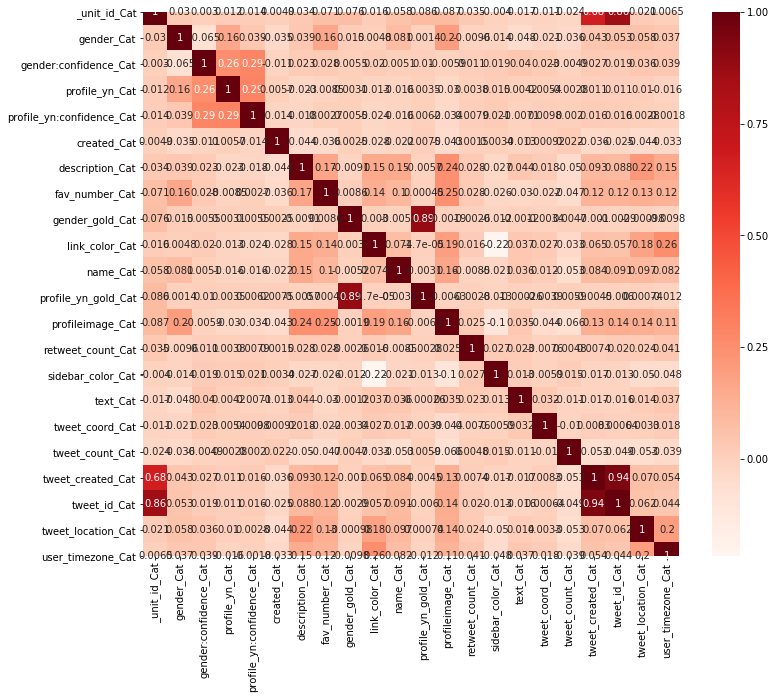

In [16]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = updated_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
import statsmodels.api as sm
X = updated_dataset.drop("gender_Cat",1)   #Feature Matrix
y = updated_dataset["gender_Cat"]
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
feature_weights = model.pvalues
feature_weights

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                         1.826732e-02
_unit_id_Cat                  1.890115e-13
gender:confidence_Cat         9.712274e-66
profile_yn_Cat               7.703031e-160
profile_yn:confidence_Cat     3.119640e-03
created_Cat                   2.785933e-04
description_Cat               1.794312e-04
fav_number_Cat                7.780765e-60
gender_gold_Cat               2.011297e-04
link_color_Cat                7.112979e-12
name_Cat                      5.228666e-11
profile_yn_gold_Cat           4.295152e-02
profileimage_Cat             2.997206e-121
retweet_count_Cat             2.866927e-02
sidebar_color_Cat             8.369055e-01
text_Cat                      7.236890e-12
tweet_coord_Cat               3.114293e-01
tweet_count_Cat               1.828829e-02
tweet_created_Cat             2.790417e-14
tweet_id_Cat                  6.094435e-16
tweet_location_Cat            5.762713e-04
user_timezone_Cat             8.931929e-03
dtype: float64

In [18]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
pmaxes = []
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmaxes.append(p)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    
    
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['_unit_id_Cat', 'gender:confidence_Cat', 'profile_yn_Cat', 'profile_yn:confidence_Cat', 'created_Cat', 'description_Cat', 'fav_number_Cat', 'gender_gold_Cat', 'link_color_Cat', 'name_Cat', 'profile_yn_gold_Cat', 'profileimage_Cat', 'retweet_count_Cat', 'text_Cat', 'tweet_count_Cat', 'tweet_created_Cat', 'tweet_id_Cat', 'tweet_location_Cat', 'user_timezone_Cat']


In [19]:
cols

['_unit_id_Cat',
 'gender:confidence_Cat',
 'profile_yn_Cat',
 'profile_yn:confidence_Cat',
 'created_Cat',
 'description_Cat',
 'fav_number_Cat',
 'gender_gold_Cat',
 'link_color_Cat',
 'name_Cat',
 'profile_yn_gold_Cat',
 'profileimage_Cat',
 'retweet_count_Cat',
 'text_Cat',
 'tweet_count_Cat',
 'tweet_created_Cat',
 'tweet_id_Cat',
 'tweet_location_Cat',
 'user_timezone_Cat']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
model = LinearRegression()
rfe_final =  RFE(model)
rfe_features1 = []
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
    rfe_final = rfe
for feature_list_index in rfe_final.get_support(indices=True):
        rfe_features1.append(updated_dataset.columns[feature_list_index])
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.075621


In [21]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['gender:confidence_Cat', 'profile_yn_Cat', 'profile_yn:confidence_Cat',
       'gender_gold_Cat', 'profile_yn_gold_Cat', 'retweet_count_Cat',
       'tweet_coord_Cat', 'tweet_created_Cat', 'tweet_id_Cat',
       'user_timezone_Cat'],
      dtype='object')


In [22]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.961866
Best score using built-in LassoCV: 0.066673


In [23]:
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Text(0.5, 1.0, 'Feature importance using Lasso Model')

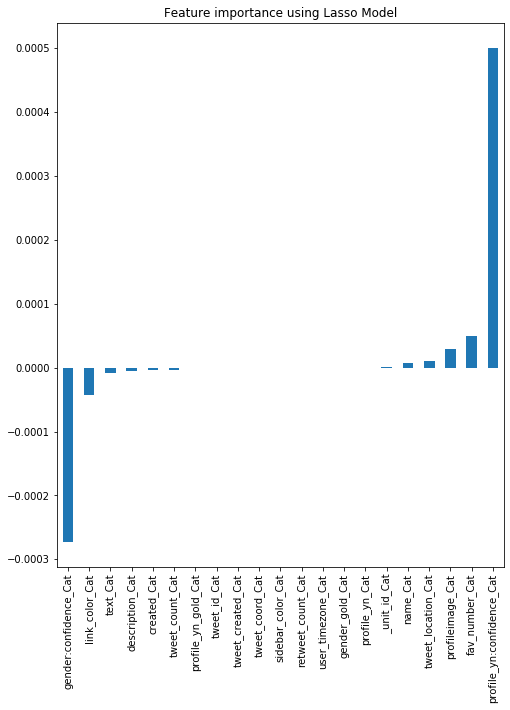

In [24]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "bar")
plt.title("Feature importance using Lasso Model")

In [25]:
lasso_features = []
print(imp_coef)
for x,y in imp_coef.items():
    if y > -0.02:
        lasso_features.append(x)
print(lasso_features)

gender:confidence_Cat       -2.728405e-04
link_color_Cat              -4.321090e-05
text_Cat                    -8.373188e-06
description_Cat             -5.327260e-06
created_Cat                 -4.148055e-06
tweet_count_Cat             -3.888623e-06
profile_yn_gold_Cat          0.000000e+00
tweet_id_Cat                 0.000000e+00
tweet_created_Cat            0.000000e+00
tweet_coord_Cat             -0.000000e+00
sidebar_color_Cat            0.000000e+00
retweet_count_Cat           -0.000000e+00
user_timezone_Cat            0.000000e+00
gender_gold_Cat              0.000000e+00
profile_yn_Cat               0.000000e+00
_unit_id_Cat                 5.340376e-07
name_Cat                     7.779013e-06
tweet_location_Cat           1.071536e-05
profileimage_Cat             2.972591e-05
fav_number_Cat               4.911944e-05
profile_yn:confidence_Cat    5.006405e-04
dtype: float64
['gender:confidence_Cat', 'link_color_Cat', 'text_Cat', 'description_Cat', 'created_Cat', 'tweet_count_

Features : 
       _unit_id_Cat  gender:confidence_Cat  profile_yn_Cat  \
0                 0                    923               1   
1                 1                    923               1   
2                 2                    562               1   
3                 3                    923               1   
4                 4                    923               1   
...             ...                    ...             ...   
20045         20045                    923               1   
20046         20046                    923               1   
20047         20047                    923               1   
20048         20048                    915               1   
20049         20049                    923               1   

       profile_yn:confidence_Cat  created_Cat  description_Cat  \
0                            266         4986            13023   
1                            266         1347             6068   
2                            266         3705

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Confusion Matrix : 
[[ 21   0   0   0   0]
 [  0 696 241 234  32]
 [  0 272 753 297   6]
 [  0 345 482 400  16]
 [  0  96  48  48  23]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.49      0.58      0.53      1203
           2       0.49      0.57      0.53      1328
           3       0.41      0.32      0.36      1243
           4       0.30      0.11      0.16       215

    accuracy                           0.47      4010
   macro avg       0.54      0.51      0.52      4010
weighted avg       0.46      0.47      0.46      4010



C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\U

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\U

KNN Score : 
0.49850374064837905


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

Cross Validation Scores : 
[0.40927218 0.46011964 0.40907957 0.36517835 0.3999501 ]
cv_scores mean:0.4087199688015077


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

Best K Value : 
{'n_neighbors': 39}
Best KNN Score : 
0.44738154613466335


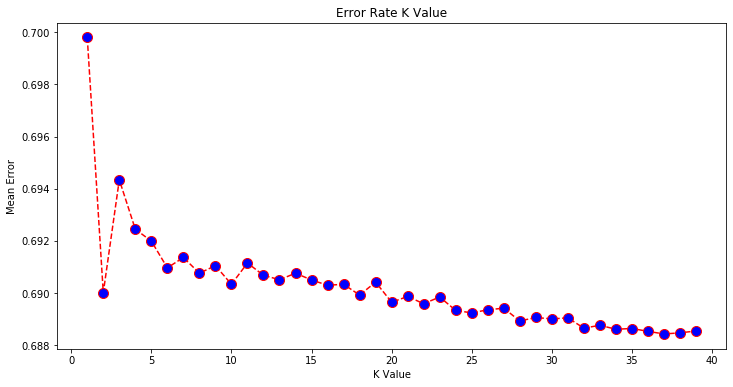

In [26]:
#backward elimination set
y = updated_dataset.loc[:,['gender_Cat']].values
knnModel(updated_dataset[selected_features_BE],y)

Features : 
       gender_Cat  gender:confidence_Cat  profile_yn_Cat  description_Cat  \
0               3                    923               1            13023   
1               3                    923               1             6068   
2               3                    562               1            13439   
3               3                    923               1             7647   
4               2                    923               1             9201   
...           ...                    ...             ...              ...   
20045           2                    923               1              481   
20046           3                    923               1            11519   
20047           3                    923               1              284   
20048           2                    915               1             1765   
20049           2                    923               1            10110   

       fav_number_Cat  gender_gold_Cat  name_Cat  profileimage_

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Confusion Matrix : 
[[  18    0    0    0    0]
 [   0 1150   31    0    0]
 [   0   28 1291    9    0]
 [   0    0   24 1222    5]
 [   0    0    0   62  170]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.98      0.97      0.97      1181
           2       0.96      0.97      0.97      1328
           3       0.95      0.98      0.96      1251
           4       0.97      0.73      0.84       232

    accuracy                           0.96      4010
   macro avg       0.97      0.93      0.95      4010
weighted avg       0.96      0.96      0.96      4010



C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\U

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\U

KNN Score : 
0.9379052369077306


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

Cross Validation Scores : 
[0.41824526 0.48978066 0.48740334 0.42205039 0.41492016]
cv_scores mean:0.44647996220468855


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

Best K Value : 
{'n_neighbors': 32}
Best KNN Score : 
0.4799002493765586


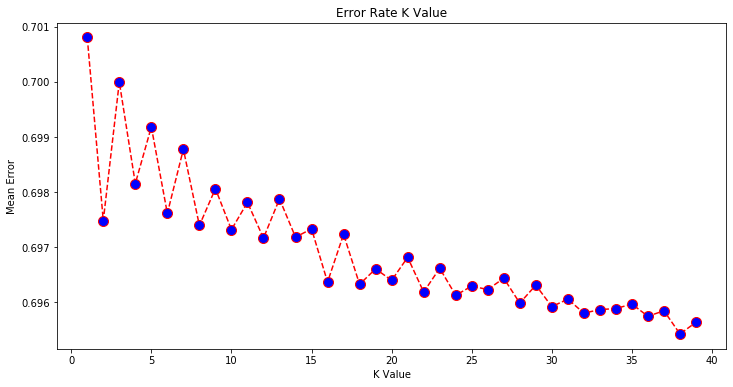

In [27]:
#feature selection with linear regression (11 features)
y = updated_dataset.loc[:,['gender_Cat']].values
knnModel(updated_dataset[rfe_features1],y)

Features : 
       gender:confidence_Cat  profile_yn_Cat  profile_yn:confidence_Cat  \
0                        923               1                        266   
1                        923               1                        266   
2                        562               1                        266   
3                        923               1                        266   
4                        923               1                        266   
...                      ...             ...                        ...   
20045                    923               1                        266   
20046                    923               1                        266   
20047                    923               1                        266   
20048                    915               1                        266   
20049                    923               1                        266   

       gender_gold_Cat  profile_yn_gold_Cat  retweet_count_Cat  \
0                    

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Confusion Matrix : 
[[ 16   0   0   0   0]
 [  0 622 302 239  31]
 [  0 471 487 356  20]
 [  0 492 412 331  21]
 [  0  98  35  55  22]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.37      0.52      0.43      1194
           2       0.39      0.37      0.38      1334
           3       0.34      0.26      0.30      1256
           4       0.23      0.10      0.14       210

    accuracy                           0.37      4010
   macro avg       0.47      0.45      0.45      4010
weighted avg       0.36      0.37      0.36      4010



C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\U

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\U

KNN Score : 
0.39775561097256856


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

Cross Validation Scores : 
[0.35468594 0.30259222 0.23322524 0.27313545 0.36352295]
cv_scores mean:0.30543236160925824


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

Best K Value : 
{'n_neighbors': 38}
Best KNN Score : 
0.3252369077306733


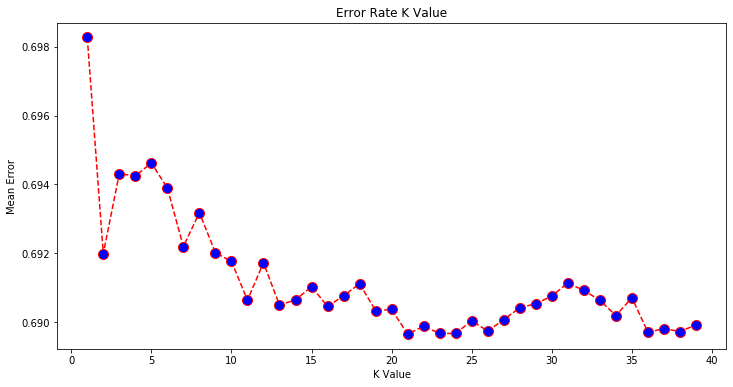

In [28]:
#feature selection with linear regression (10 features)
y = updated_dataset.loc[:,['gender_Cat']].values
knnModel(updated_dataset[selected_features_rfe],y)

Features : 
       gender:confidence_Cat  link_color_Cat  text_Cat  description_Cat  \
0                        923             248     13473            13023   
1                        923              77     18365             6068   
2                        562            2013     17413            13439   
3                        923              77      9181             7647   
4                        923            1019     16006             9201   
...                      ...             ...       ...              ...   
20045                    923              77      5170              481   
20046                    923            2331      8844            11519   
20047                    923              77     16797              284   
20048                    915            1804      4295             1765   
20049                    923              77     10215            10110   

       created_Cat  tweet_count_Cat  profile_yn_gold_Cat  tweet_id_Cat  \
0            

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Confusion Matrix : 
[[ 22   0   0   0   0]
 [  0 726 228 232  27]
 [  0 282 695 324  12]
 [  0 342 473 394   8]
 [  0 107  60  46  32]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.50      0.60      0.54      1213
           2       0.48      0.53      0.50      1313
           3       0.40      0.32      0.36      1217
           4       0.41      0.13      0.20       245

    accuracy                           0.47      4010
   macro avg       0.56      0.52      0.52      4010
weighted avg       0.46      0.47      0.45      4010



C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\U

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\U

KNN Score : 
0.49551122194513714


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

Cross Validation Scores : 
[0.40977069 0.46061815 0.40858069 0.36393115 0.3999501 ]
cv_scores mean:0.4085701563282266


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\si

Best K Value : 
{'n_neighbors': 39}
Best KNN Score : 
0.4474812967581047


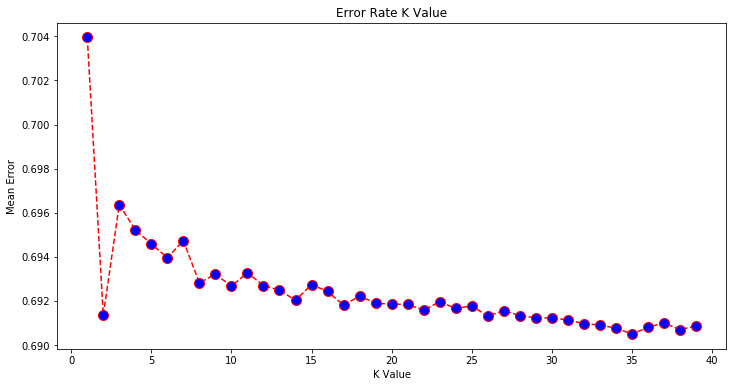

In [29]:
#feature selection with lasso
y = updated_dataset.loc[:,['gender_Cat']].values
knnModel(updated_dataset[lasso_features],y)

In [30]:
def remap( x, oMin, oMax, nMin, nMax ):

    #range check
    if oMin == oMax:
        print("Warning: Zero input range")
        return None

    if nMin == nMax:
        print("Warning: Zero output range")
        return None

    #check reversed input range
    reverseInput = False
    oldMin = min( oMin, oMax )
    oldMax = max( oMin, oMax )
    if not oldMin == oMin:
        reverseInput = True

    #check reversed output range
    reverseOutput = False   
    newMin = min( nMin, nMax )
    newMax = max( nMin, nMax )
    if not newMin == nMin :
        reverseOutput = True

    portion = (x-oldMin)*(newMax-newMin)/(oldMax-oldMin)
    if reverseInput:
        portion = (oldMax-x)*(newMax-newMin)/(oldMax-oldMin)

    result = portion + newMin
    if reverseOutput:
        result = newMax - portion

    return result

In [31]:
#privacy scoring (after multiplying the weights)
import operator

old_min=0.0
new_min=1.0
old_max=1.0
new_max=5.0
scaled_numbers = {}
     
for x in weights:
    multiplication_value = weights[x] * feature_weights[x]
    scaled_number = remap(multiplication_value, old_min, old_max, new_min, new_max )
    scaled_numbers[x] = scaled_number
print("Privacy Scoring :")
cd = sorted(scaled_numbers.items(),key=operator.itemgetter(1),reverse=True)
cd

Privacy Scoring :


[('sidebar_color_Cat', 7.695244148560229),
 ('tweet_coord_Cat', 7.228585895465615),
 ('profile_yn_gold_Cat', 1.5154182721869898),
 ('tweet_count_Cat', 1.3657657488215245),
 ('user_timezone_Cat', 1.1786385776734365),
 ('retweet_count_Cat', 1.1146770935018186),
 ('profile_yn:confidence_Cat', 1.0124785609831013),
 ('tweet_location_Cat', 1.0115254264378013),
 ('created_Cat', 1.003343119655553),
 ('gender_gold_Cat', 1.003218075489756),
 ('description_Cat', 1.0014354497854523),
 ('name_Cat', 1.0000000004182932),
 ('link_color_Cat', 1.0000000001138076),
 ('text_Cat', 1.0000000000868428),
 ('_unit_id_Cat', 1.0000000000037803),
 ('tweet_created_Cat', 1.0000000000001117),
 ('tweet_id_Cat', 1.0000000000000049),
 ('gender:confidence_Cat', 1.0),
 ('profile_yn_Cat', 1.0),
 ('fav_number_Cat', 1.0),
 ('profileimage_Cat', 1.0)]

In [32]:
updated_dataset['privacy_score'] = 0
updated_dataset.dtypes

_unit_id_Cat                 int32
gender_Cat                   int32
gender:confidence_Cat        int32
profile_yn_Cat               int32
profile_yn:confidence_Cat    int32
created_Cat                  int32
description_Cat              int32
fav_number_Cat               int32
gender_gold_Cat              int32
link_color_Cat               int32
name_Cat                     int32
profile_yn_gold_Cat          int32
profileimage_Cat             int32
retweet_count_Cat            int32
sidebar_color_Cat            int32
text_Cat                     int32
tweet_coord_Cat              int32
tweet_count_Cat              int32
tweet_created_Cat            int32
tweet_id_Cat                 int32
tweet_location_Cat           int32
user_timezone_Cat            int32
privacy_score                int64
dtype: object

In [33]:
old_min=0.0
new_min=1.0
old_max=65.0
new_max=5.0
sum = 0
count = 0

for index, row in dataset.iterrows():
    weight = 0
    for item in features:
        if row[item] != '-1':
            weight += orignal_weights[item]
    scaled_number = round(remap(weight, old_min, old_max, new_min, new_max ))
    sum += scaled_number
    count += 1
    dataset.at[index,"privacy_score"] = scaled_number

KeyError: 'link_color'

In [ ]:
print("Average Scoring:", (sum/count))

In [ ]:
#run up to here
dataset

In [ ]:
import random
import math
p= []
scaling = []
X_1 = X[cols]
X_1 = sm.add_constant(X_1)
model = sm.OLS(y,X_1).fit()
p = pd.Series(model.pvalues.values[1:],index = cols)

scaled_numbers = []

for item in p:
    scaled_number = remap(item, old_min, old_max, new_min, new_max )
    scaled_numbers.append(scaled_number)
    
scaled_numbers = [ele for ele in scaled_numbers] 
print(scaled_numbers)
print(selected_features_BE)
sorted_array = [x for _, x in sorted(zip(scaled_numbers,selected_features_BE), key=lambda pair: pair[0])]
print(sorted_array)